# Import des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("biodeg.csv", sep = ";", header = None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


Les colonnes ne sont pas explicites : elles sont nombreuses et non titrées. On va donc devoir rajouter leur nom et description dans le dataframe pour une meilleur visibilité.

(Nota Bene :  Nous devons aussi sauvegarder les description car les titres ne sont presque que des abréviations, donc pas plus explicite que les chiffres en soit, il faut donc les allier à leur description détaillée pour les comprendre )

Pour cela nous avons nous même créer un fichier csv avec les description des données trouvables sur le site d'où les données ont été téléchargé (https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation#)



In [4]:
data_description = pd.read_csv("biodeg_description.csv")

In [5]:
data_description

,titre,description
0,SpMax_L,Leading eigenvalue from Laplace matrix
1,J_Dz(e),Balaban-like index from Barysz matrix weighted...
2,nHM,Number of heavy atoms
3,F01[N-N],Frequency of N-N at topological distance 1
4,F04[C-N],Frequency of C-N at topological distance 4
5,NssssC,Number of atoms of type ssssC
6,nCb-,Number of substituted benzene C(sp2)
7,C%,Percentage of C atoms
8,nCp,Number of terminal primary C(sp3)
9,nO,Number of oxygen atoms


In [6]:
dataset.columns = data_description.titre

In [7]:
dataset.head()

titre,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,RB


Nos données sont maintenant importés! Maintenant il faut qu'on les nettoient avant de les explorer en détails

# Nettoyage des données

Nous vérifions tout d'abord s'il y a des valeurs manquantes

In [8]:
dataset.isnull().sum().sum()

0

Il n'y a aucune valeur nul dans notre dataset, donc aucune ligne ou colonne à supprimer de ce côté là

Regardons maintenant sous quel format nos données sont enregistrés dans le dataframe.

In [9]:
dataset.dtypes

titre
SpMax_L               float64
J_Dz(e)               float64
nHM                     int64
F01[N-N]                int64
F04[C-N]                int64
NssssC                  int64
nCb-                    int64
C%                    float64
nCp                     int64
nO                      int64
F03[C-N]                int64
SdssC                 float64
HyWi_B(m)             float64
LOC                   float64
SM6_L                 float64
F03[C-O]                int64
Me                    float64
Mi                    float64
nN-N                    int64
nArNO2                  int64
nCRX3                   int64
SpPosA_B(p)           float64
nCIR                    int64
B01[C-Br]               int64
B03[C-Cl]               int64
N-073                   int64
SpMax_A               float64
Psi_i_1d              float64
B04[C-Br]               int64
SdO                   float64
TI2_L                 float64
nCrt                    int64
C-026                   int64
F02[

On remarque que "experimental class" est considéré comme un objet. Cependant il correspond à un booléen : Biodégradable ou non biodégradable. Ainsi on remplace ses valeurs par des 0 et des 1, et renommons aussi la colonne par "biodégradable" pour savoir à quoi correspond ce booleen. Cela sera plus simple pour la classification. 

In [10]:
dataset.rename(columns = {"experimental class": "biodegradable"}, inplace = True);
dataset.replace(["RB","NRB"],[1,0], inplace = True)

In [11]:
dataset.head()

titre,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,biodegradable
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,0,0.000,3.106,2.550,9.002,0,0.960,1.142,0,0,0,1.201,0,0,0,0,1.932,0.011,0,0.000,4.489,0,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,0,0.000,2.461,1.393,8.723,1,0.989,1.144,0,0,0,1.104,1,0,0,0,2.214,-0.204,0,0.000,1.542,0,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,0,0.000,2.100,0.918,6.594,0,1.108,1.167,0,0,0,1.024,0,0,0,0,1.414,1.073,0,8.361,1.333,0,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1


Notre dataset étant propre nous allons pouvoir commencer à l'explorer

# Datavisualisation

In [12]:
dataset.describe()

titre,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,biodegradable
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,1.436967,-0.197129,3.476844,1.350716,9.937381,3.630332,1.013302,1.131106,0.008531,0.073934,0.029384,1.238727,1.405687,0.039810,0.147867,0.031280,2.215641,-0.001206,0.026540,8.780510,2.668344,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,0.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,3.116577,0.769662,0.584150,0.786166,0.928678,4.457243,0.046494,0.030143,0.101802,0.317475,0.217997,0.096466,4.788542,0.195606,0.355137,0.199544,0.226131,0.158928,0.160812,11.895889,2.096607,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.256000,1.544000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.863000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.000000,0.000000,0.444000,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,0.000000,-0.191000,3.105000,0.875000,9.533000,0.000000,0.983000,1.116000,0.000000,0.000000,0.000000,1.182000,0.000000,0.000000,0.000000,0.000000,2.101000,-0.008000,0.000000,0.000000,1.446500,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,0.000000,0.000000,3.442000,1.187000,10.039000,2.000000,1.003000,1.130000,0.000000,0.000000,0.000000,1.243000,1.000000,0.000000,0.000000,0.000000,2.247000,0.000000,0.000000,0.000000,2.052000,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,2.000000,0.000000,3.825500,1.705000,10.514500,6.000000,1.029000,1.143000,0.000000,0.000000,0.000000,1.296000,2.000000,0.000000,0.000000,0.000000,2.358000,0.005000,0.000000,12.465000,3.146000,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,1.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.311000,1.377000,2.000000,3.000000,3.000000,1.641000,147.000000,1.000000,1.000000,3.000000,2.859000,1.073000,1.000000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,1.000000


En regardant rapidement les données, on observe que beaucoup de valeur sont à 0, ceci est assez rare dans des cas classique de base de donnée. Il nous faut donc vérifier si cela n'est pas une erreur et pourquoi notre base de donnée est comme ça.

En regardant la description des données ont remarque que beaucoup de ces variables représentent des nombres d'un certains type d'atom. C'est donc normal de retrouver régulièrement des zéros, car les atomes ou configuration sont absents dans la plupart des molécules.

Il ne s'agit donc pas de valeurs erronnées


Il nous faut maintenant trouver les variables significatives parmis les 40.

Nous allons séparer le dataset en 2 entre biodégradable et non biodégradable afin d'observer quels paramètres sont les plus significatifs pour les différencier

In [13]:
biodegradable_data= dataset.loc[dataset["biodegradable"] == 1]
non_biodegradable_data= dataset.loc[dataset["biodegradable"] == 0]

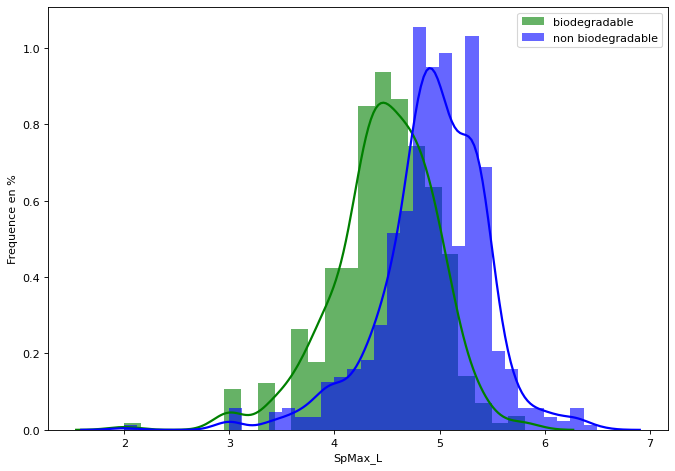

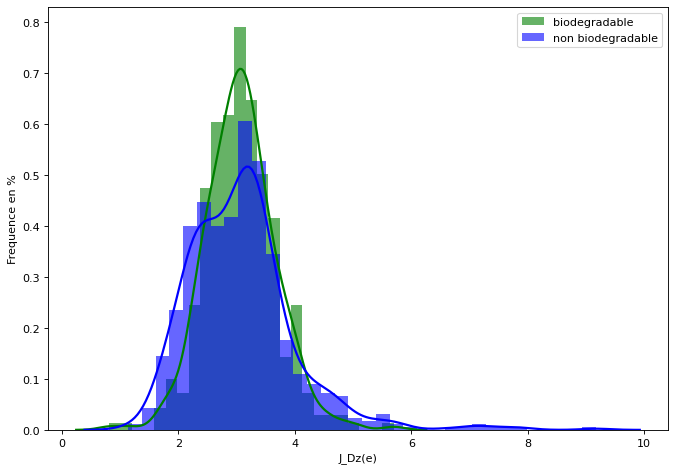

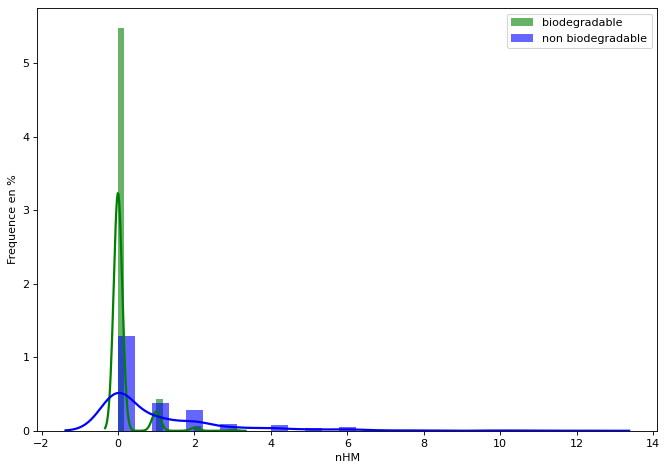

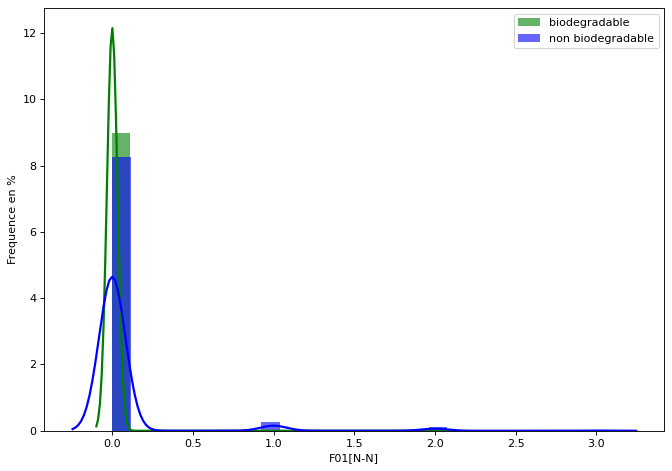

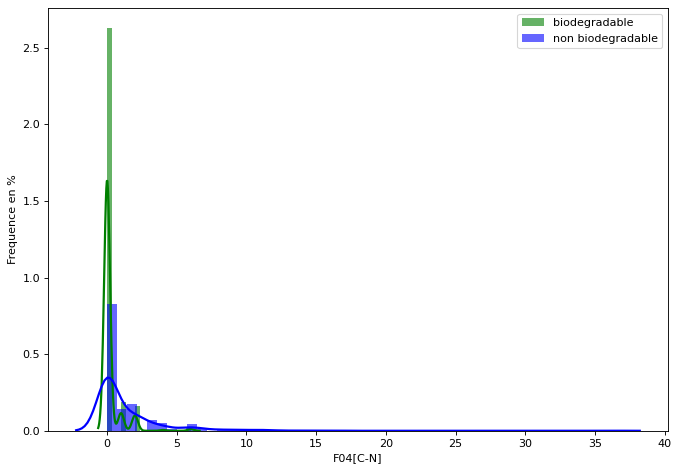

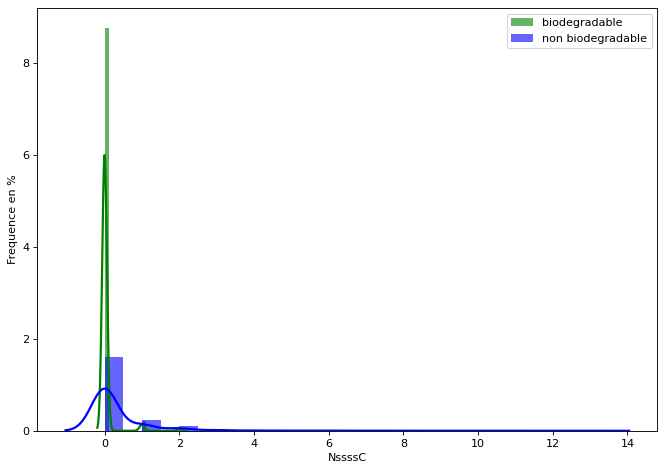

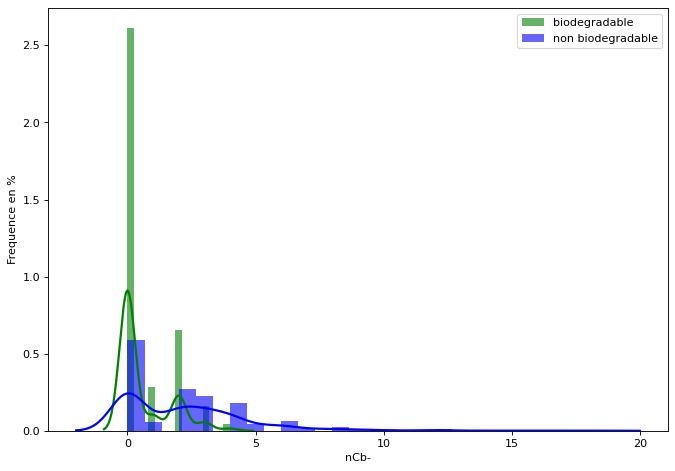

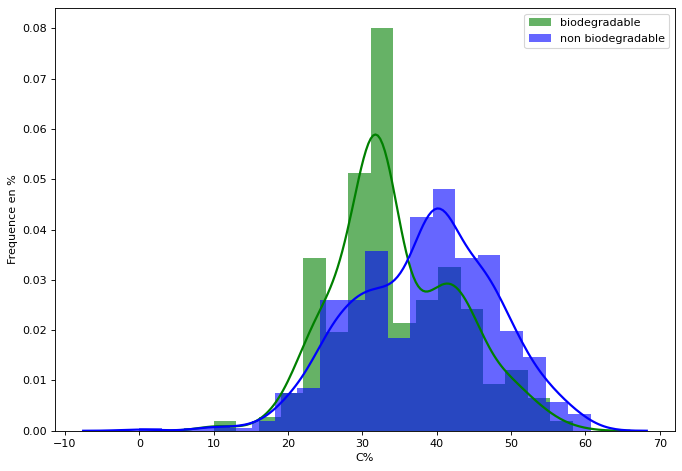

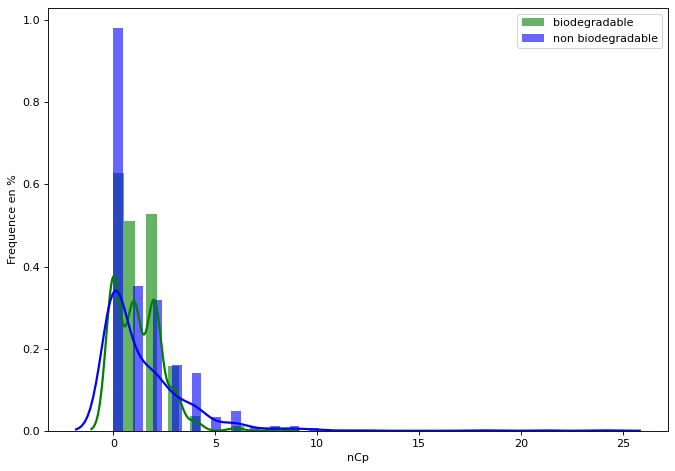

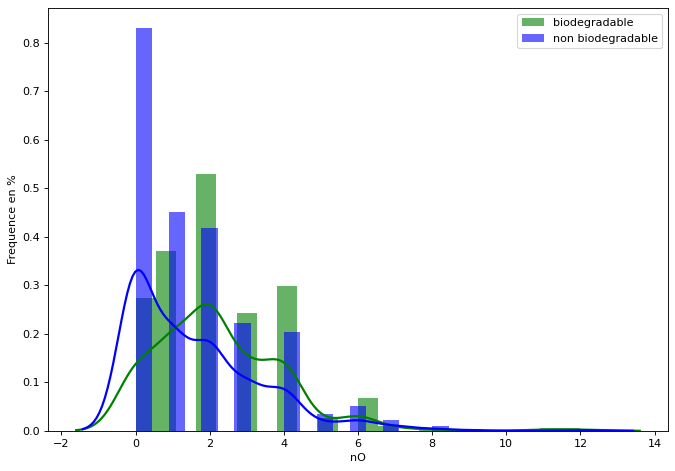

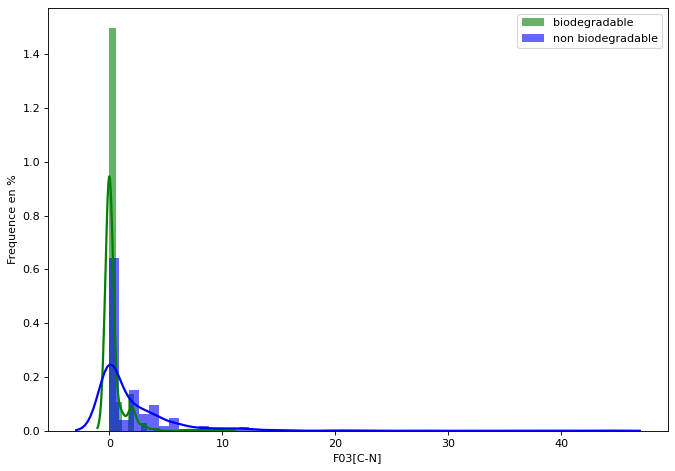

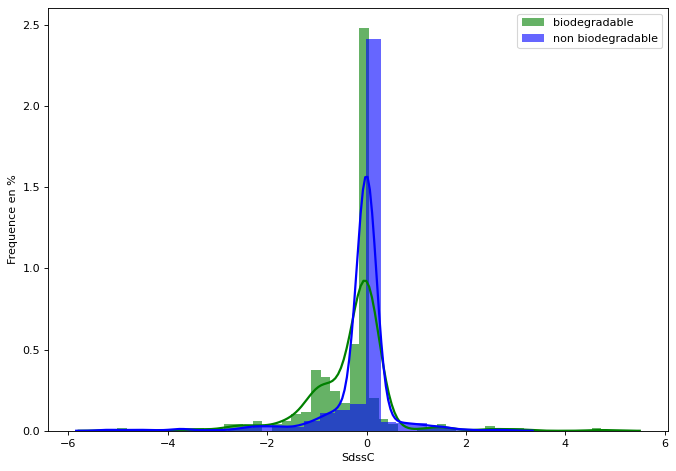

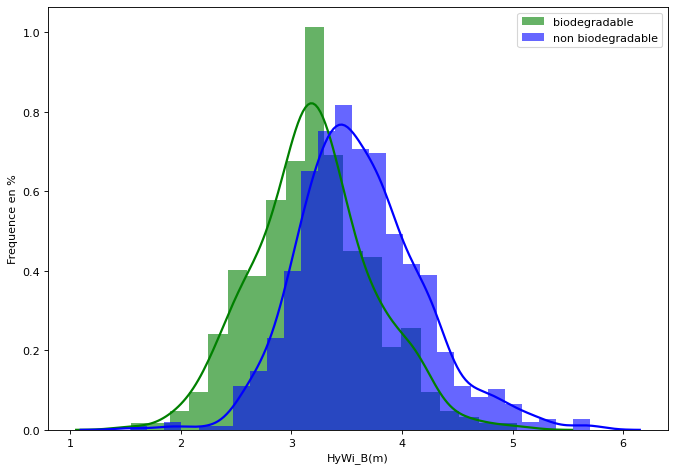

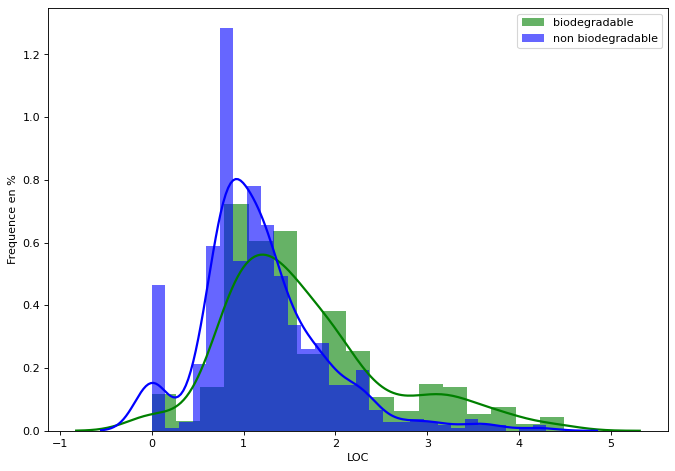

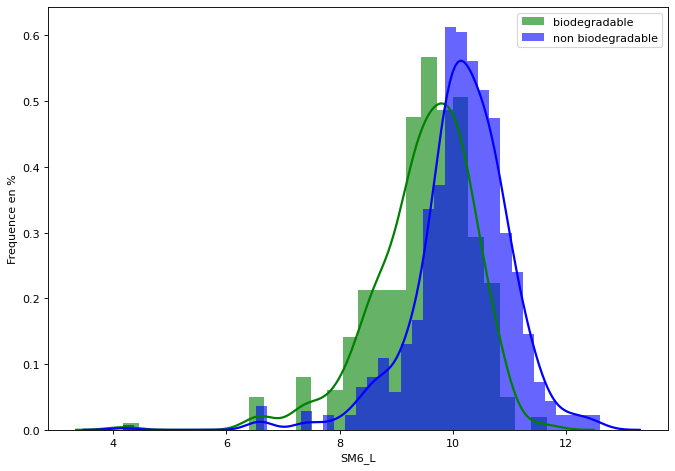

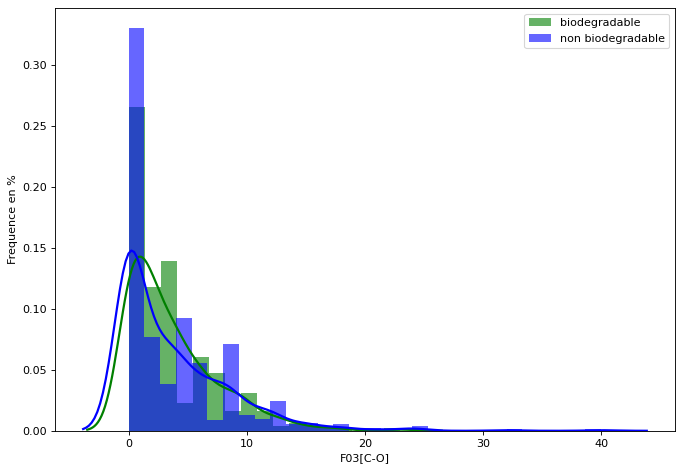

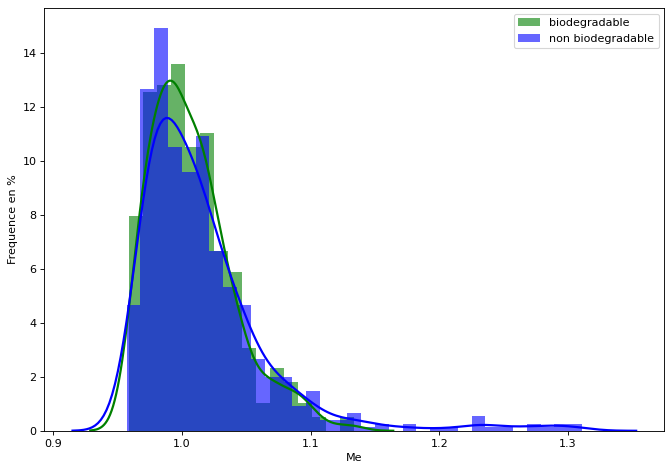

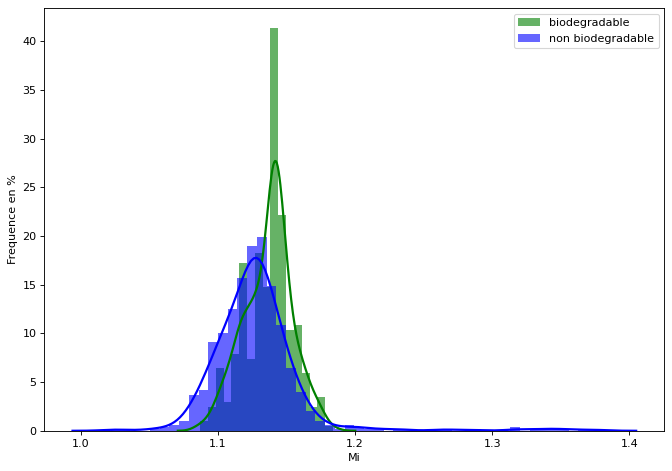

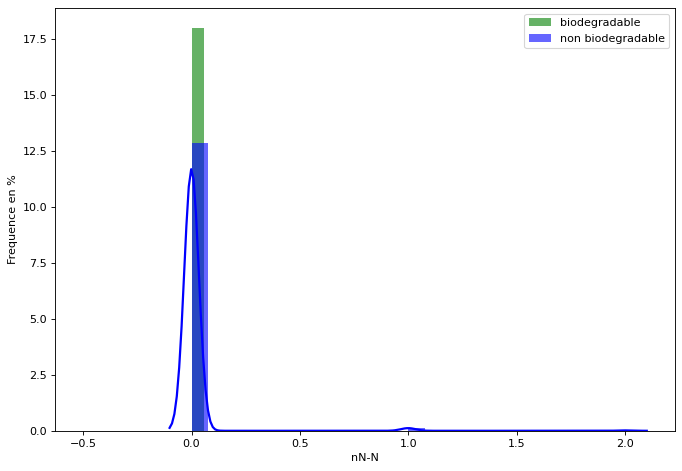

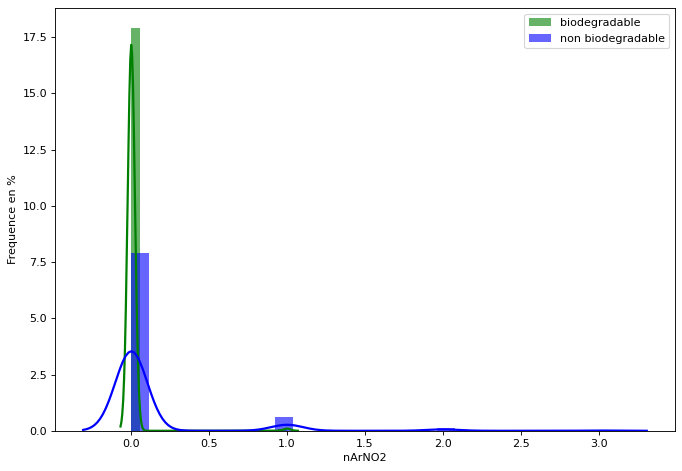

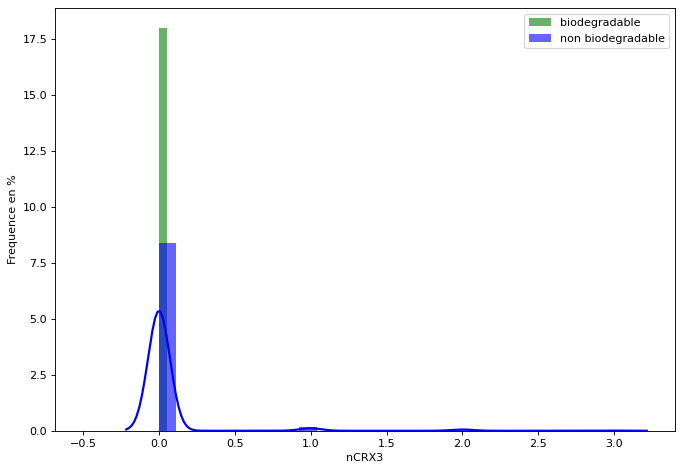

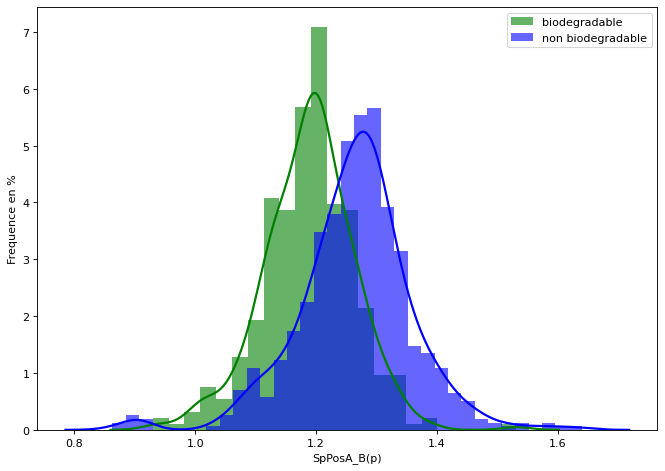

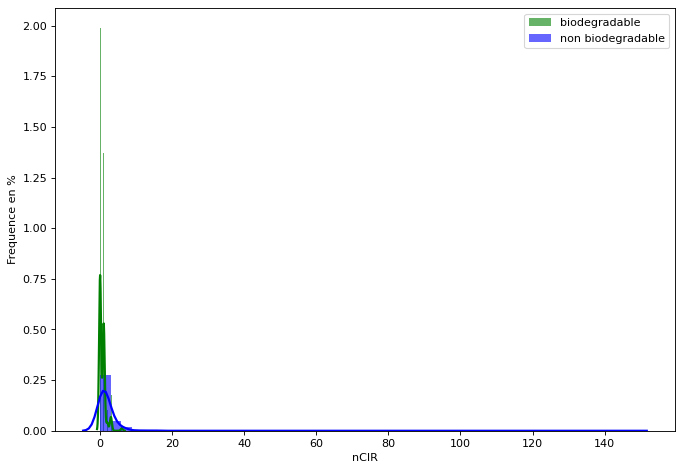

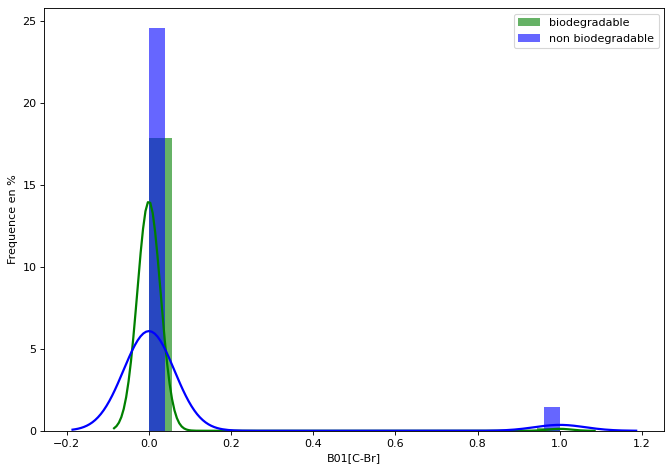

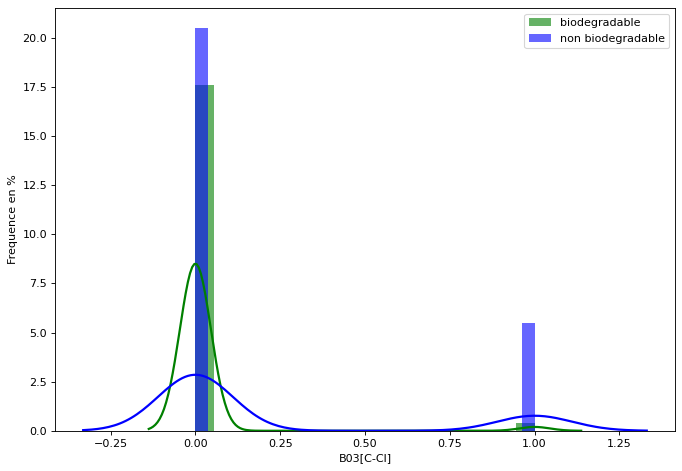

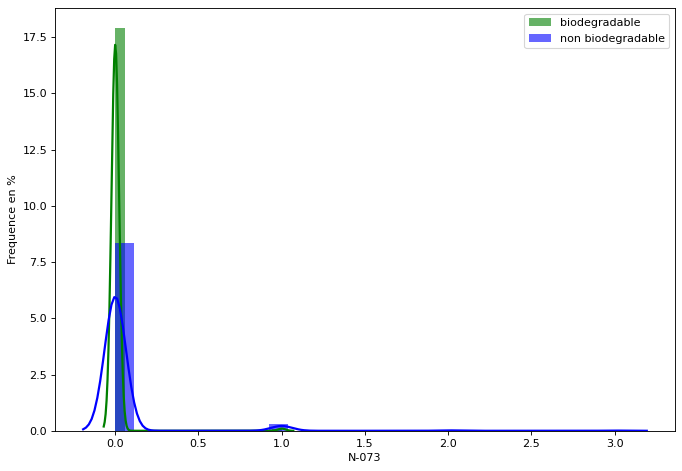

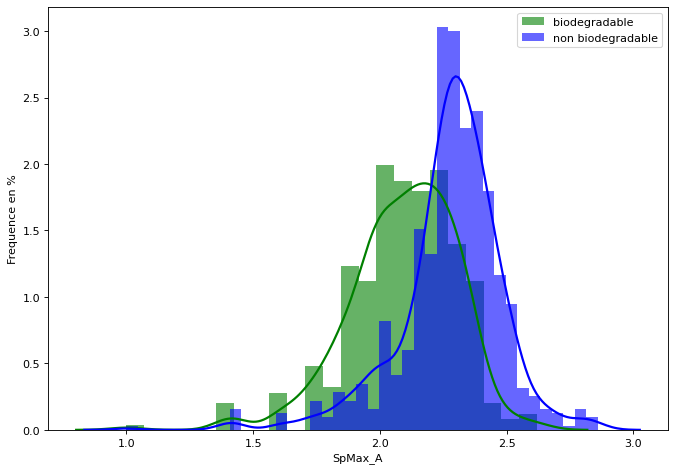

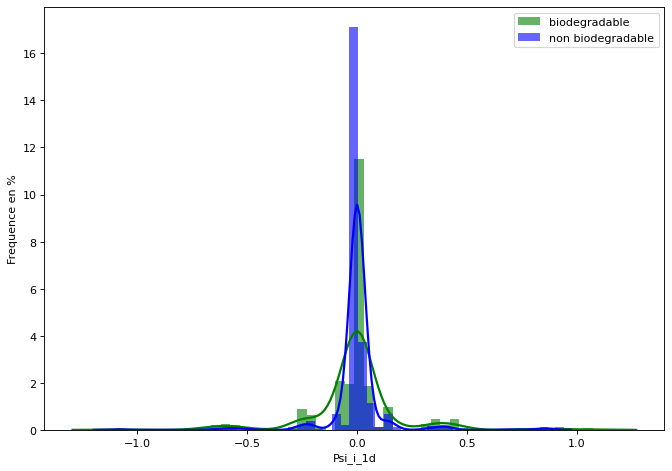

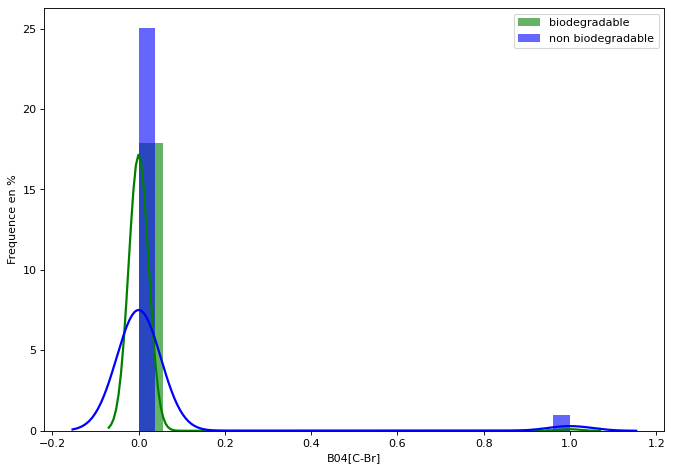

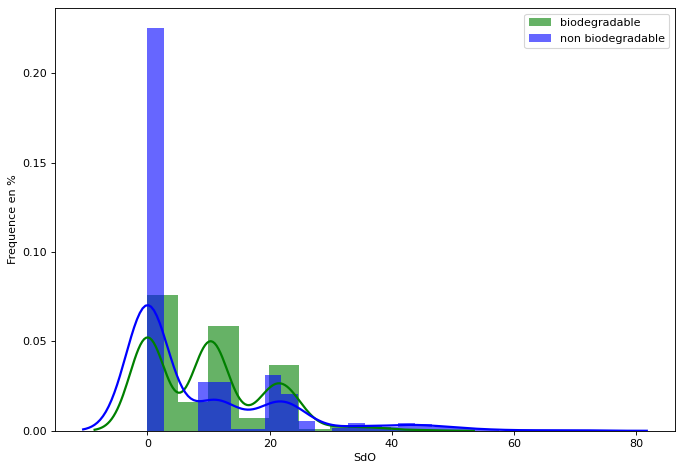

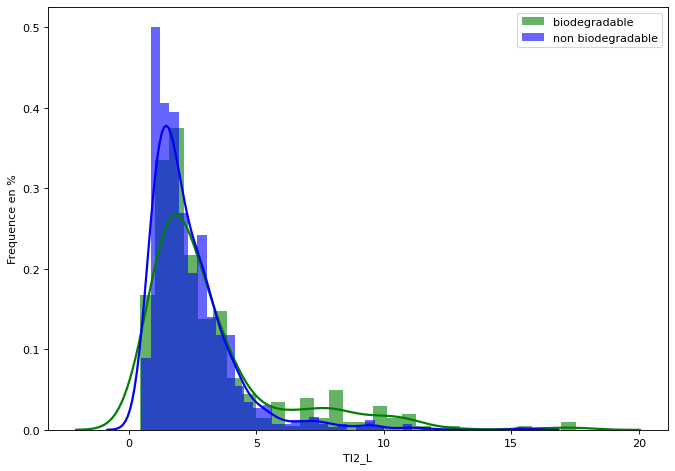

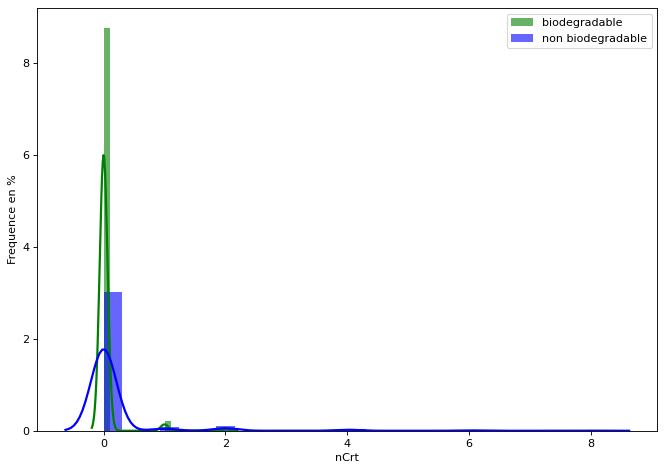

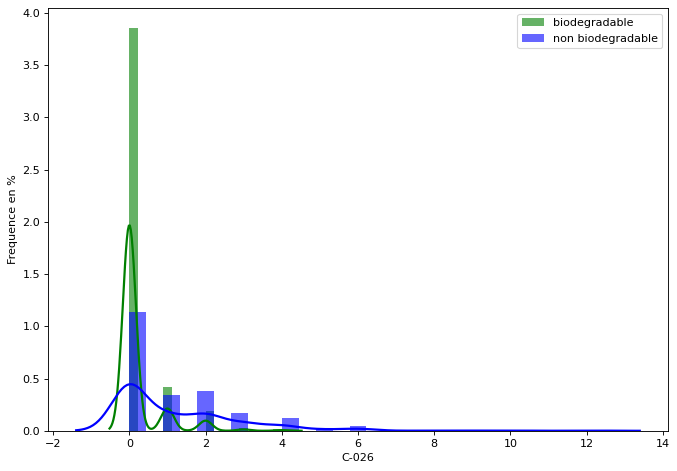

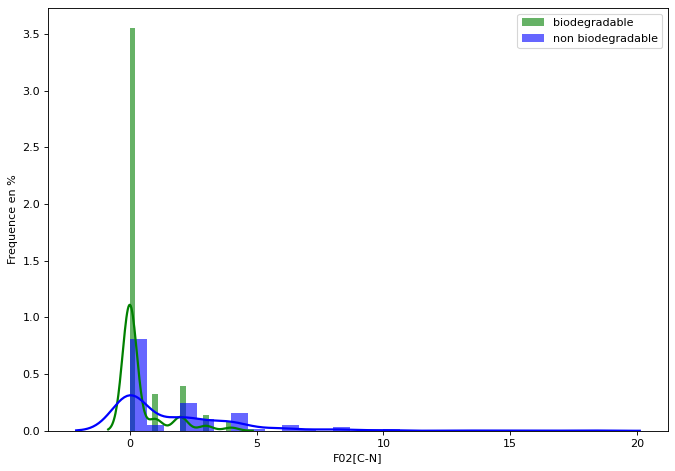

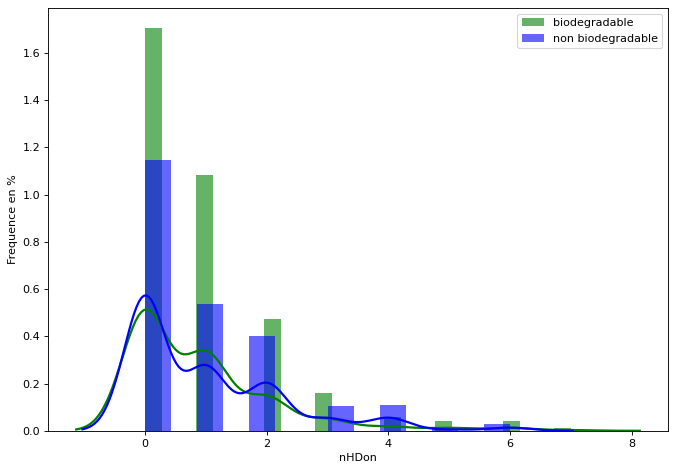

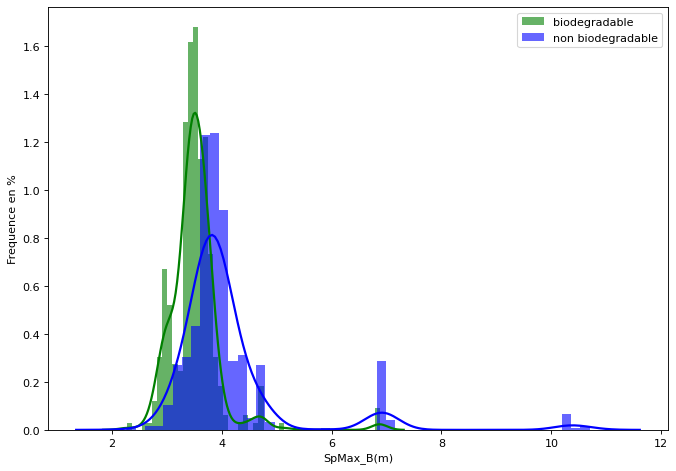

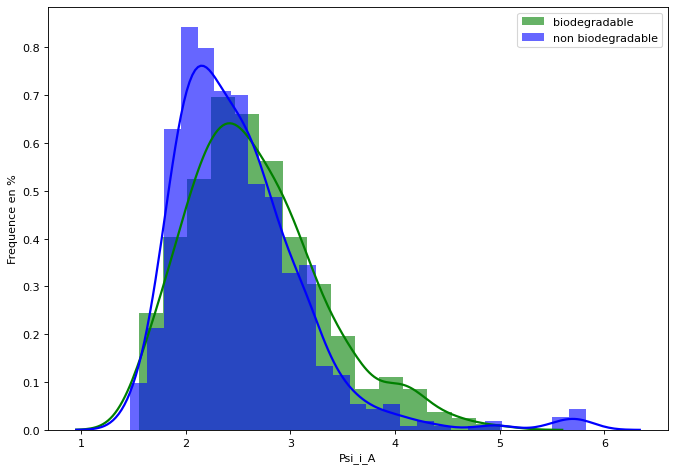

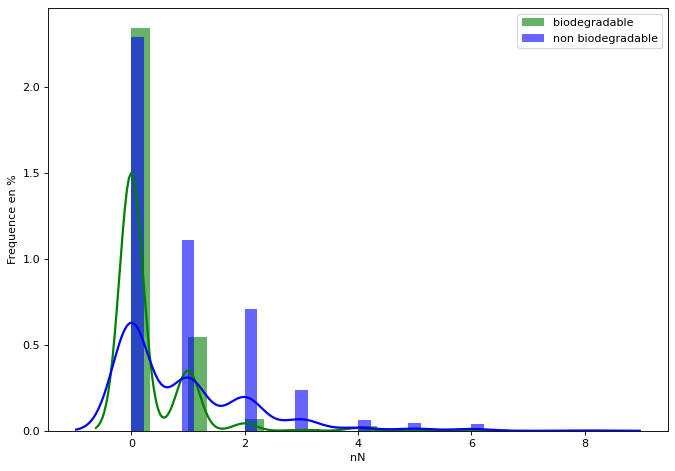

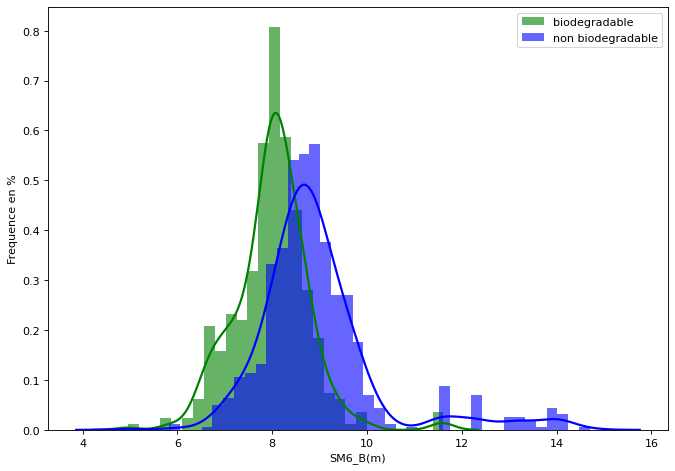

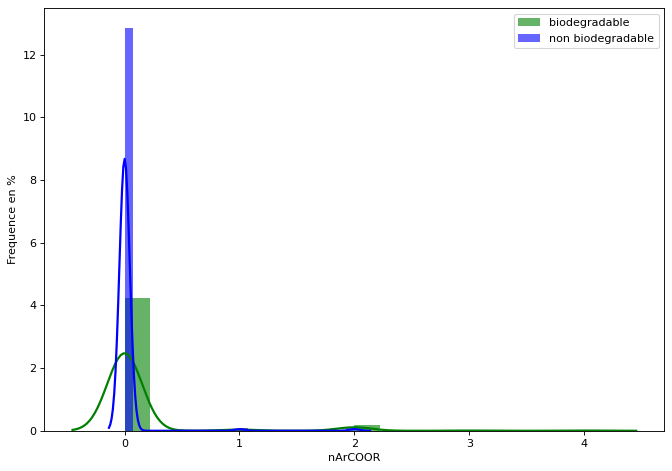

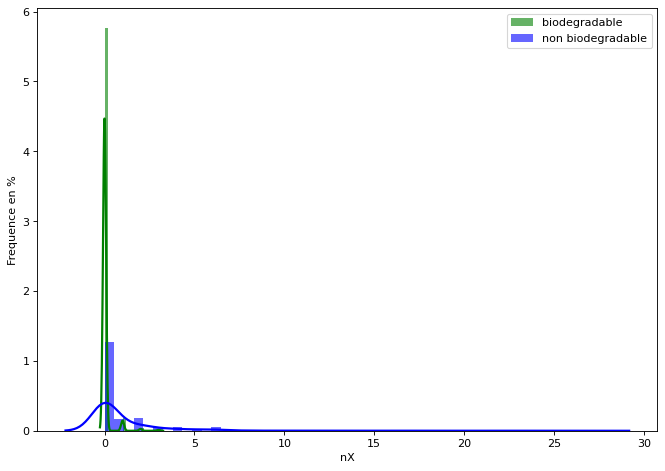

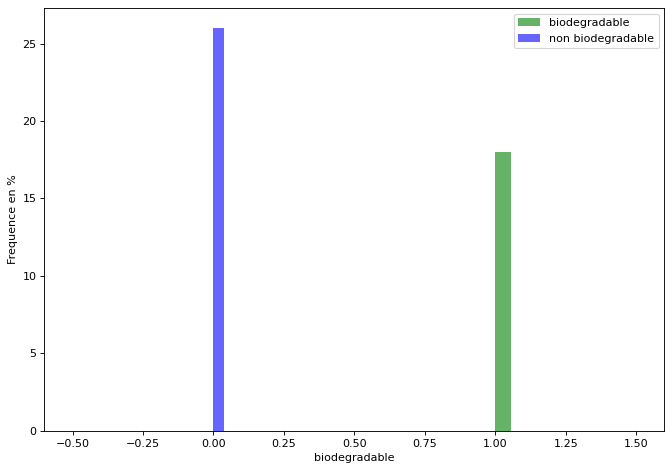

In [14]:
import warnings
warnings.simplefilter('ignore')

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

for var in list(dataset):
    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(biodegradable_data[var], color="g", label = "biodegradable", **kwargs)
    sns.distplot(non_biodegradable_data[var],  color="b", label = "non biodegradable", **kwargs )
    plt.ylabel("Frequence en %")
    plt.legend()
    plt.show()

On remarque grâce aux différents histogrammes que les variables différenciant le plus biodégradable et non biodégradable sont :


*   SpMax_L
*   C%
*   HyWi_B(m)
*   SM6_L
*   SpPosA_B(p)
*   SpMax_A
*   SpMax_B(m)
*   SM6_B(m)

Ces graphiques permettent de visualiser plus rapidements les variables importantes. Cela est encore plus le cas car nous avions 40 variables. 

In [15]:
data_parameter_imp=["SpMax_L","C%","HyWi_B(m)","SM6_L","SpPosA_B(p)","SpMax_A","SpMax_B(m)","SM6_B(m)"]

In [16]:
data_description.loc[data_description['titre'].isin(data_parameter_imp)]

,titre,description
0,SpMax_L,Leading eigenvalue from Laplace matrix
7,C%,Percentage of C atoms
12,HyWi_B(m),Hyper-Wiener-like index (log function) from Bu...
14,SM6_L,Spectral moment of order 6 from Laplace matrix
21,SpPosA_B(p),Normalized spectral positive sum from Burden m...
26,SpMax_A,Leading eigenvalue from adjacency matrix (Lova...
35,SpMax_B(m),Leading eigenvalue from Burden matrix weighted...
38,SM6_B(m),Spectral moment of order 6 from Burden matrix ...


Maintenant, il est intéressant d'observer si des variables sont fortement corélées parmis celle ci :

In [17]:
dataset[data_parameter_imp].corr()

titre,SpMax_L,C%,HyWi_B(m),SM6_L,SpPosA_B(p),SpMax_A,SpMax_B(m),SM6_B(m)
titre,,,,,,,,
SpMax_L,1.000000,0.381464,0.642858,0.911546,0.230438,0.918928,0.305638,0.489765
C%,0.381464,1.000000,0.352416,0.429790,0.623108,0.568842,0.149713,0.280505
HyWi_B(m),0.642858,0.352416,1.000000,0.805254,0.421537,0.673059,0.565551,0.821144
SM6_L,0.911546,0.429790,0.805254,1.000000,0.231165,0.922649,0.252469,0.514928
SpPosA_B(p),0.230438,0.623108,0.421537,0.231165,1.000000,0.311172,0.527758,0.590619
SpMax_A,0.918928,0.568842,0.673059,0.922649,0.311172,1.000000,0.259384,0.471681
SpMax_B(m),0.305638,0.149713,0.565551,0.252469,0.527758,0.259384,1.000000,0.917443
SM6_B(m),0.489765,0.280505,0.821144,0.514928,0.590619,0.471681,0.917443,1.000000


On remarque que SpMax_L est fortement corrélé à SM6_L et à SpMax_A. De même, SM6_B(m) et SpMax_B(m) sont aussi fortement corrélé

Ainsi en retirant les variables fortement corrélées (qui pourrait faire doublon dans certains modèles), on obtient cette liste de paramètres importants :

*   SpMax_L
*   C%
*   HyWi_B(m)
*   SpPosA_B(p)
*   SpMax_B(m)

In [18]:
dataset.corr().applymap(lambda x: x if abs(x)>.85 else "---")

titre,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,F03[C-N],SdssC,HyWi_B(m),LOC,SM6_L,F03[C-O],Me,Mi,nN-N,nArNO2,nCRX3,SpPosA_B(p),nCIR,B01[C-Br],B03[C-Cl],N-073,SpMax_A,Psi_i_1d,B04[C-Br],SdO,TI2_L,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,biodegradable
titre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SpMax_L,1,---,---,---,---,---,---,---,---,---,---,---,---,---,0.911546,---,---,---,---,---,---,---,---,---,---,---,0.918928,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
J_Dz(e),---,1,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
nHM,---,---,1,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
F01[N-N],---,---,---,1,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
F04[C-N],---,---,---,---,1,---,---,---,---,---,0.870518,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
NssssC,---,---,---,---,---,1,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
nCb-,---,---,---,---,---,---,1,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
C%,---,---,---,---,---,---,---,1,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
nCp,---,---,---,---,---,---,---,---,1,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---


In [22]:
parameter_correlated=["SM6_L", "SpMax_A", "SM6_B(m)","F04[C-N]"]

On remarque aussi qu'il n'y a presque pas d'autres variables fortement corrélées dans le dataset en générale

**Conclusion de la datavisualisation :** 

Les paramètres importants pour la classification sont :

*   SpMax_L
*   C%
*   HyWi_B(m)
*   SpPosA_B(p)
*   SpMax_B(m)

On peut aussi observer que beaucoup de valeurs sont égales à 0 (certains paramètres ont assez peu d'occurence).

Les seuls paramètres fortement corrélés sont des paramètres qui sont signifiactif dans la classification (représenté par un seul pour éviter un poids trop fort sur certains modèles).

On peut aussi remarquer que le dataset n'est pas totalement équilibré. En effet il y a 66% de molécules non biodégradables pour seulement 34% de molécules dégradables. Ce déséquilibre pourra poser problème lors de l'apprentisage du modèle, le poids des molécules non biodégradable étant plus élevé.


# Modélisation

Split des données

In [23]:
from sklearn.model_selection import train_test_split

results=[] #memoire pour enregistrer la qualite de chaque modele (cf plus loin)

x = dataset[list(set(dataset.columns) - set(parameter_correlated))].drop("biodegradable", axis = 1) #On retire un des parametres fortement corrélé pour qu'il n'y ait pas de binome de parametre fortement corrélé (ce qui peut poser problème pour certains modèles)
y = dataset.biodegradable
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=92, test_size=0.20)

In [24]:
x_train.shape, x_test.shape

((844, 37), (211, 37))

In [25]:
y_train.shape , y_test.shape

((844,), (211,))

In [26]:
x_train.head()

titre,nArNO2,nN,C%,SdO,J_Dz(e),HyWi_B(m),SpPosA_B(p),nHM,F01[N-N],nArCOOR,SpMax_L,nHDon,Me,F03[C-O],nCRX3,SdssC,Mi,nCb-,nN-N,TI2_L,LOC,nCrt,N-073,NssssC,B04[C-Br],F02[C-N],SpMax_B(m),Psi_i_A,nCIR,nX,Psi_i_1d,B01[C-Br],nO,F03[C-N],C-026,B03[C-Cl],nCp
732,0,0,23.8,0.000,4.1328,3.037,1.044,0,0,0,5.303,4,1.029,12,0,0.000,1.159,0,0,1.164,1.392,0,0,1,0,0,3.331,3.472,0,0,0.047,0,4,0,0,0,4
825,0,6,41.9,50.918,1.6237,5.032,1.265,4,2,0,5.051,2,1.032,14,0,-2.695,1.124,14,0,9.592,0.964,0,0,0,0,18,4.016,2.595,4,4,0.000,0,8,20,12,1,2
719,0,0,20.0,0.000,1.9808,2.771,1.306,2,0,0,3.000,0,1.083,0,0,0.000,1.144,0,0,1.333,0.918,0,0,0,0,0,3.813,3.241,0,2,0.870,0,0,0,0,0,1
720,0,0,20.0,0.000,1.9184,3.572,1.439,2,0,0,3.000,0,1.064,0,0,0.000,1.123,0,0,1.333,0.918,0,0,0,0,0,6.870,2.787,0,2,0.803,1,0,0,0,0,1
173,0,0,47.1,10.310,2.6955,3.359,1.243,0,0,0,4.877,0,1.037,6,0,0.000,1.110,3,0,1.496,0.943,0,0,0,0,0,3.775,2.591,3,0,0.004,0,3,0,2,0,0


In [ ]:
y_train.head()

732    0
825    0
719    0
720    0
173    1
Name: biodegradable, dtype: int64

Nous allons tester les modèles suivants :

*   Régression Logistique
*   kNN
*   Random Forest
*   Support Vector Machine (SVM)
*   Neural Networks rectified linear unit
*   Neural Networks logistic sigmoid




Pour comparer les modèles, nous gardons en mémoire leur accuracy, leur precision, leur sensitivity et leur F1 score.

Les modèles sont testés avec différents hyperparamettres afin d'obtenir le meilleur F1_score

Régression Logistique :

In [27]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

#Creation du modele
logReg = LogisticRegression(random_state=92)
logReg.fit(x_train,y_train)
logReg_pred = logReg.predict(x_test)

#Qualite du modele
print("Regression Logistique :\n")
cm=metrics.confusion_matrix(y_test,logReg_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalisation
print("Matrice de confusion :")
print(cm)
acc = metrics.accuracy_score(y_test, logReg_pred)
prec = metrics.precision_score(y_test, logReg_pred)
sens = metrics.recall_score(y_test, logReg_pred)
f_score= 2*(prec*sens)/(prec+sens)
print("Accuracy : " + str(acc))
print("Precision : " + str(prec))
print("Sensitivity : " + str(sens))
print("F1 score : " + str(f_score))

#Sauvegarde du resultat
results.append([acc,prec,sens,f_score])

Regression Logistique :

Matrice de confusion :
[[0.87121212 0.12878788]
 [0.18987342 0.81012658]]
Accuracy : 0.8483412322274881
Precision : 0.7901234567901234
Sensitivity : 0.810126582278481
F1 score : 0.8


kNN :

In [28]:
# Test de differents k pour avoir le meilleur hyperparametre

from sklearn.neighbors import KNeighborsClassifier

k = 0
f_score_best = 0
for i in range(1,41) :
    KNN_temp=KNeighborsClassifier(n_neighbors = i)
    KNN_temp.fit(x_train,y_train)
    KNN_temp_pred = KNN_temp.predict(x_test)
    prec_temp = metrics.precision_score(y_test, KNN_temp_pred)
    sens_temp = metrics.recall_score(y_test, KNN_temp_pred)
    f_score_temp= 2*(prec_temp*sens_temp)/(prec_temp+sens_temp)
    if f_score_temp>f_score_best:
        k=i
        f_score_best=f_score_temp
print("k = " + str(k))

k = 6


In [29]:
#Creation du modele
KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(x_train,y_train)
KNN_pred = KNN.predict(x_test)

#Qualite du modele
print("KNN :\n")
cm=metrics.confusion_matrix(y_test,KNN_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalisation

print("Matrice de confusion :")
print(cm)
acc = metrics.accuracy_score(y_test, KNN_pred)
prec = metrics.precision_score(y_test, KNN_pred)
sens = metrics.recall_score(y_test, KNN_pred)
f_score= 2*(prec*sens)/(prec+sens)
print("Accuracy : " + str(acc))
print("Precision : " + str(prec))
print("Sensitivity : " + str(sens))
print("F1 score : " + str(f_score))

#Sauvegarde du resultat
results.append([acc,prec,sens,f_score])

KNN :

Matrice de confusion :
[[0.88636364 0.11363636]
 [0.29113924 0.70886076]]
Accuracy : 0.8199052132701422
Precision : 0.7887323943661971
Sensitivity : 0.7088607594936709
F1 score : 0.7466666666666666


Random Forest :

In [30]:
#choix du nombre d'arbre dans la foret pour avoir le meilleur hyperparametre

from sklearn.ensemble import RandomForestClassifier

n = 0
f_score_best = 0
for i in range(1,200) :
    Rand_Forest_temp=RandomForestClassifier(n_estimators = i, random_state=92)
    Rand_Forest_temp.fit(x_train,y_train)
    Rand_Forest_temp_pred = Rand_Forest_temp.predict(x_test)
    prec_temp = metrics.precision_score(y_test, Rand_Forest_temp_pred)
    sens_temp = metrics.recall_score(y_test, Rand_Forest_temp_pred)
    f_score_temp= 2*(prec_temp*sens_temp)/(prec_temp+sens_temp)
    if f_score_temp>f_score_best:
        n=i
        f_score_best=f_score_temp
print("n = " + str(n))

n = 39


In [31]:
#Creation du modele
Rand_Forest = RandomForestClassifier(n_estimators = n, random_state=92)
Rand_Forest.fit(x_train,y_train)
Rand_Forest_pred = Rand_Forest.predict(x_test)

#Qualite du modele
print("Random Forest :\n")

cm=metrics.confusion_matrix(y_test,Rand_Forest_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalisation
print("Matrice de confusion :")
print(cm)
acc = metrics.accuracy_score(y_test, Rand_Forest_pred)
prec = metrics.precision_score(y_test, Rand_Forest_pred)
sens = metrics.recall_score(y_test, Rand_Forest_pred)
f_score= 2*(prec*sens)/(prec+sens)
print("Accuracy : " + str(acc))
print("Precision : " + str(prec))
print("Sensitivity : " + str(sens))
print("F1 score : " + str(f_score))

#Sauvegarde du resultat
results.append([acc,prec,sens,f_score])

Random Forest :

Matrice de confusion :
[[0.90909091 0.09090909]
 [0.21518987 0.78481013]]
Accuracy : 0.8625592417061612
Precision : 0.8378378378378378
Sensitivity : 0.7848101265822784
F1 score : 0.8104575163398693


Support Vector Machine (SVM)

In [32]:
from sklearn.svm import LinearSVC

#Creation du modele
SVM=LinearSVC(random_state=92,C=0.90) #Test d'hyperparametre de maniere mannuelle
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)

#Qualite du modele
print("SVM :\n")

cm=metrics.confusion_matrix(y_test,SVM_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalisation
print("Matrice de confusion :")
print(cm)
acc = metrics.accuracy_score(y_test, SVM_pred)
prec = metrics.precision_score(y_test, SVM_pred)
sens = metrics.recall_score(y_test, SVM_pred)
f_score= 2*(prec*sens)/(prec+sens)
print("Accuracy : " + str(acc))
print("Precision : " + str(prec))
print("Sensitivity : " + str(sens))
print("F1 score : " + str(f_score))

#Sauvegarde du resultat
results.append([acc,prec,sens,f_score])

SVM :

Matrice de confusion :
[[0.85606061 0.14393939]
 [0.13924051 0.86075949]]
Accuracy : 0.8578199052132701
Precision : 0.7816091954022989
Sensitivity : 0.8607594936708861
F1 score : 0.8192771084337349


Neural Networks rectified linear unit


In [33]:
#Test d'hyperparametre

from sklearn.neural_network import MLPClassifier

hl = 0
f_score_best = 0
for i in range(80,110) :
    NeuralNetworksRelu_temp=MLPClassifier(random_state=92,hidden_layer_sizes=(i,i),activation='relu', alpha=0.0001, batch_size='auto', learning_rate='constant', max_iter=200)
    NeuralNetworksRelu_temp.fit(x_train,y_train)
    NeuralNetworksRelu_temp_pred = NeuralNetworksRelu_temp.predict(x_test)
    prec_temp = metrics.precision_score(y_test, NeuralNetworksRelu_temp_pred)
    sens_temp = metrics.recall_score(y_test, NeuralNetworksRelu_temp_pred)
    f_score_temp= 2*(prec_temp*sens_temp)/(prec_temp+sens_temp)
    if f_score_temp>f_score_best:
        hl=i
        f_score_best=f_score_temp
print("hl = " + str(hl))

hl = 108


In [34]:
#Creation du modele
NeuralNetworksRelu=MLPClassifier(random_state=92,hidden_layer_sizes=(hl,hl),activation='relu', alpha=0.0001, batch_size='auto', learning_rate='constant', max_iter=200)
NeuralNetworksRelu.fit(x_train,y_train)
NeuralNetworksRelu_pred=NeuralNetworksRelu.predict(x_test)

#Qualite du modele
print("Neural Networks Relu :\n")

cm=metrics.confusion_matrix(y_test,NeuralNetworksRelu_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalisation
print("Matrice de confusion :")
print(cm)
acc = metrics.accuracy_score(y_test, NeuralNetworksRelu_pred)
prec = metrics.precision_score(y_test, NeuralNetworksRelu_pred)
sens = metrics.recall_score(y_test, NeuralNetworksRelu_pred)
f_score= 2*(prec*sens)/(prec+sens)
print("Accuracy : " + str(acc))
print("Precision : " + str(prec))
print("Sensitivity : " + str(sens))
print("F1 score : " + str(f_score))

#Sauvegarde du resultat
results.append([acc,prec,sens,f_score])

Neural Networks Relu :

Matrice de confusion :
[[0.86363636 0.13636364]
 [0.13924051 0.86075949]]
Accuracy : 0.8625592417061612
Precision : 0.7906976744186046
Sensitivity : 0.8607594936708861
F1 score : 0.8242424242424243


Neural Networks logistic sigmoid

In [35]:
#Test d'hyperparametre
hl2 = 0
f_score_best = 0
for i in range(100,150) :
    NeuralNetworksLog_temp=MLPClassifier(random_state=92,hidden_layer_sizes=(i,i),activation='logistic', alpha=0.0001, batch_size='auto', learning_rate='constant', max_iter=200)
    NeuralNetworksLog_temp.fit(x_train,y_train)
    NeuralNetworksLog_temp_pred = NeuralNetworksLog_temp.predict(x_test)
    prec_temp = metrics.precision_score(y_test, NeuralNetworksLog_temp_pred)
    sens_temp = metrics.recall_score(y_test, NeuralNetworksLog_temp_pred)
    f_score_temp= 2*(prec_temp*sens_temp)/(prec_temp+sens_temp)
    if f_score_temp>f_score_best:
        hl2=i
        f_score_best=f_score_temp
print("hl2 = " + str(hl2))

hl2 = 118


In [36]:
#Creation du modele
NeuralNetworksLog=MLPClassifier(random_state=92,hidden_layer_sizes=(hl2,hl2),activation='logistic', alpha=0.0001, batch_size='auto', learning_rate='constant', max_iter=200)
NeuralNetworksLog.fit(x_train,y_train)
NeuralNetworksLog_pred=NeuralNetworksLog.predict(x_test)

#Qualite du modele
print("Neural Networks Logistic:\n")

cm=metrics.confusion_matrix(y_test,NeuralNetworksLog_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalisation
print("Matrice de confusion :")
print(cm)
acc = metrics.accuracy_score(y_test, NeuralNetworksLog_pred)
prec = metrics.precision_score(y_test, NeuralNetworksLog_pred)
sens = metrics.recall_score(y_test, NeuralNetworksLog_pred)
f_score= 2*(prec*sens)/(prec+sens)
print("Accuracy : " + str(acc))
print("Precision : " + str(prec))
print("Sensitivity : " + str(sens))
print("F1 score : " + str(f_score))

#Sauvegarde du resultat
results.append([acc,prec,sens,f_score])

Neural Networks Logistic:

Matrice de confusion :
[[0.89393939 0.10606061]
 [0.17721519 0.82278481]]
Accuracy : 0.8672985781990521
Precision : 0.8227848101265823
Sensitivity : 0.8227848101265823
F1 score : 0.8227848101265823


In [37]:
results

[[0.8483412322274881, 0.7901234567901234, 0.810126582278481, 0.8],
 [0.8199052132701422,
  0.7887323943661971,
  0.7088607594936709,
  0.7466666666666666],
 [0.8625592417061612,
  0.8378378378378378,
  0.7848101265822784,
  0.8104575163398693],
 [0.8578199052132701,
  0.7816091954022989,
  0.8607594936708861,
  0.8192771084337349],
 [0.8625592417061612,
  0.7906976744186046,
  0.8607594936708861,
  0.8242424242424243],
 [0.8672985781990521,
  0.8227848101265823,
  0.8227848101265823,
  0.8227848101265823]]

# Comparaison des modèles

Mise en page des résultats pour une meilleur lecture

In [38]:
Resultats_colums=["Accuracy","Precision","Sensitivity","F1_score"]
Resultats_index =["LogReg","KNN","Random_Forest","SVM","Neural_Networks_Relu","Neural_Networks_Logistic"]

In [39]:
resultat_df = pd.DataFrame(results,columns = Resultats_colums ,index=Resultats_index)
resultat_df

,Accuracy,Precision,Sensitivity,F1_score
LogReg,0.848341,0.790123,0.810127,0.800000
KNN,0.819905,0.788732,0.708861,0.746667
Random_Forest,0.862559,0.837838,0.784810,0.810458
SVM,0.857820,0.781609,0.860759,0.819277
Neural_Networks_Relu,0.862559,0.790698,0.860759,0.824242
Neural_Networks_Logistic,0.867299,0.822785,0.822785,0.822785


In [40]:
resultat_df=resultat_df.sort_values(by="F1_score",ascending = False)
resultat_df

,Accuracy,Precision,Sensitivity,F1_score
Neural_Networks_Relu,0.862559,0.790698,0.860759,0.824242
Neural_Networks_Logistic,0.867299,0.822785,0.822785,0.822785
SVM,0.857820,0.781609,0.860759,0.819277
Random_Forest,0.862559,0.837838,0.784810,0.810458
LogReg,0.848341,0.790123,0.810127,0.800000
KNN,0.819905,0.788732,0.708861,0.746667


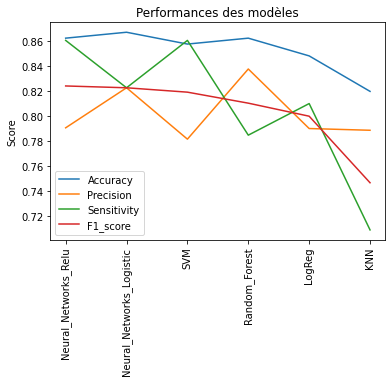

In [42]:
resultat_df.plot()
plt.xticks(rotation=90)
plt.legend(Resultats_colums)
plt.ylabel("Score")
plt.title("Performances des modèles");

On remarque les points suivants :

De manière générale, tous les modèles (à l'exception du kNN) nous donnent des prédictions assez bonnes dans l'ensemble mais pas non plus excelentes.

Les modèles les plus précis sont les réseaux de neuronnes ici, nottament la version rectified linear unit. On peut tout de même noter que le SVM se démarque par sa très bonne sensitivité (proportion de vrais positifs). De plus, la random forest se démarque par une grande exactitude et une grande precision.

Ces deux derniers modèles ne sont clairement pas inintérressant car ils dépassent ou égalisent le réseau de neuronnes rectified linear unit sur certains points. Une combinaison de ces modèles pourrait être envisagé afin d'obtenir d'encore meilleurs résultats. Cependant le réseau de neuronnes rectified linear unit offre déjà de bons et plus constants résultats, il sera donc à utiliser en priorité (si aucune combianaaison n'est faite).

# Conclusion

Le modèle a utilisé est donc le réseau de neurones logistique. La combinaison des différents modèles serait une piste d'amélioration (à faire via la librairie ensemble de sklearn)

# Exportation pour l'API Flask

In [44]:
import pickle
pickle.dump(logReg, open('modeles/logReg.pickle', 'wb'))
pickle.dump(KNN, open('modeles/KNN.pickle', 'wb'))
pickle.dump(Rand_Forest, open('modeles/Rand_Forest.pickle', 'wb'))
pickle.dump(SVM, open('modeles/SVM.pickle', 'wb'))
pickle.dump(NeuralNetworksRelu, open('modeles/NeuralNetworksRelu.pickle', 'wb'))
pickle.dump(NeuralNetworksLog, open('modeles/NeuralNetworksLog.pickle', 'wb'))